# Laboratorium 12. (Całkowanie numeryczne)

In [1]:
import math

import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate

## 1. Próbki prędkości i przebyta droga

### 1.1. Implementacja metody trapezów

In [2]:
def trapezoid_rule(f, a, b, n):
    h = (b - a) / n
    result = 0.5 * (f(a) + f(b))
    for i in range(1, n):
        result += f(a + i * h)
    return result * h

### 1.2. Funkcja prędkości

In [3]:
def speed_function(t):
    intervals = [
        (0, 8, lambda t: 15 + 4 * t),
        (8, 12, lambda t: 47 + 2 * (t - 8)),
        (12, 18, lambda t: 55 - 1.5 * (t - 12)),
        (18, 25, lambda t: 46 - 3 * (t - 18)),
        (25, 30, lambda t: 25 - 2 * (t - 25)),
        (30, 35, lambda t: 15 - 1.5 * (t - 30)),
        (35, 40, lambda t: 7.5 - 1 * (t - 35)),
    ]

    for start, end, speed_calc in intervals:
        if start <= t <= end:
            return speed_calc(t)

    return max(0, 2.5 - 0.5 * (t - 40))

### 1.3. Wyniki

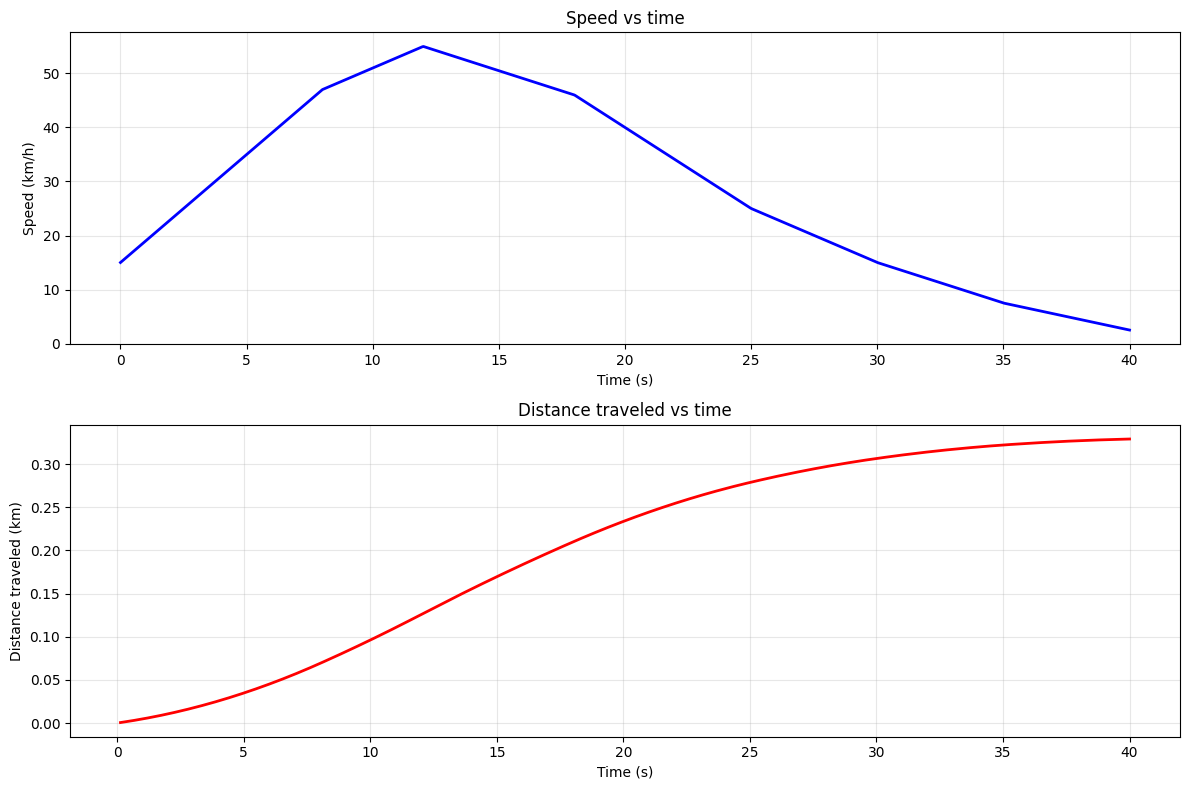

Total traveled distance: 0.3291 km


In [4]:
t_values = np.linspace(0, 40, 1000)
speed_values = [speed_function(t) for t in t_values]

total_distance = trapezoid_rule(speed_function, 0, 40, 1000) / 3600

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(t_values, speed_values, "b-", linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Speed (km/h)")
plt.title("Speed vs time")
plt.grid(True, alpha=0.3)

plt.subplot(2, 1, 2)
distances = []
time_points = []
for t in np.linspace(0, 40, 300):
    if t > 0:
        dist = trapezoid_rule(speed_function, 0, t, 100) / 3600
        distances.append(dist)
        time_points.append(t)

plt.plot(time_points, distances, "r-", linewidth=2)
plt.xlabel("Time (s)")
plt.ylabel("Distance traveled (km)")
plt.title("Distance traveled vs time")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Total traveled distance: {total_distance:.4f} km")

## 2. Złożona kwadratura Simpsona

### 2.1. Implementacja metody Simpsona

In [5]:
def simpson(f, a, b, n):
    if n % 2 != 0:
        n += 1

    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = f(x)

    result = y[0] + y[-1]

    for i in range(1, n, 2):
        result += 4 * y[i]

    for i in range(2, n, 2):
        result += 2 * y[i]

    return result * h / 3

### 2.2. Funkcje testowe

In [6]:
def f1(x):
    return np.exp(-x**2) * (np.log(x))**2

def f2(x):
    return 1 / (x**3 - 2*x - 5)

def f3(x):
    return x**5 * np.exp(-x) * np.sin(x)

### 2.3. Wyniki

In [7]:
test_cases = [
        (f1, 0.1, 2.0, "∫exp(-x²)·(ln(x))² dx"),
        (f2, 3.0, 5.0, "∫1/(x³-2x-5) dx"),
        (f3, 0.0, math.pi, "∫x⁵·exp(-x)·sin(x) dx"),
    ]

for func, a, b, description in test_cases:
    print(f"\nIntegral: {description} from {a} to {b}")
    print("-" * 50)

    quad_result, quad_error = integrate.quad(func, a, b)
    print(f"scipy.quad:      {quad_result:.10f} (error: {quad_error:.2e})")

    n_values = [10, 50, 100, 200, 500]

    for n in n_values:
        simpson_result = simpson(func, a, b, n)
        error = abs(simpson_result - quad_result)
        relative_error = error / abs(quad_result) * 100 if quad_result != 0 else 0

        print(
            f"Simpson (n={n:3d}): {simpson_result:.10f} "
            f"(error: {error:.2e}, {relative_error:.4f}%)"
        )


Integral: ∫exp(-x²)·(ln(x))² dx from 0.1 to 2.0
--------------------------------------------------
scipy.quad:      0.7565528497 (error: 1.80e-09)
Simpson (n= 10): 0.7825467406 (error: 2.60e-02, 3.4358%)
Simpson (n= 50): 0.7566988776 (error: 1.46e-04, 0.0193%)
Simpson (n=100): 0.7565632508 (error: 1.04e-05, 0.0014%)
Simpson (n=200): 0.7565535265 (error: 6.77e-07, 0.0001%)
Simpson (n=500): 0.7565528672 (error: 1.75e-08, 0.0000%)

Integral: ∫1/(x³-2x-5) dx from 3.0 to 5.0
--------------------------------------------------
scipy.quad:      0.0485306859 (error: 4.31e-14)
Simpson (n= 10): 0.0485370019 (error: 6.32e-06, 0.0130%)
Simpson (n= 50): 0.0485306971 (error: 1.12e-08, 0.0000%)
Simpson (n=100): 0.0485306866 (error: 7.00e-10, 0.0000%)
Simpson (n=200): 0.0485306860 (error: 4.38e-11, 0.0000%)
Simpson (n=500): 0.0485306859 (error: 1.12e-12, 0.0000%)

Integral: ∫x⁵·exp(-x)·sin(x) dx from 0.0 to 3.141592653589793
--------------------------------------------------
scipy.quad:      6.1506229

## 3. Oznaczone całki podwójne

### 3.1. Funkcje testowe

In [8]:
def f4(x, y):
    return 1 / (np.sqrt(x + y) * (1 + x + y))

def f5(x, y):
    return x**2 + y**2

### 3.2. Wyniki

Integral: ∫∫1/(√(x+y)·(1+x+y)) dxdy
Iterated: 0.4292036732, error: 2.11e-08
Tiled: 0.4292036732, error: 2.11e-08
Difference between methods: 0.00e+00

Integral: ∫∫(x² + y²) dxdy (trapezoidal rule)
5x5 mesh: 765.0000000000
10x10 mesh: 696.7901234568
20x20 mesh: 683.7673130194
50x50 mesh: 680.5664306539
100x100 mesh: 680.1387613509

Reference value (integral2): 680.0000000000
integral2 method error: 7.55e-12

Accuracy comparison:
5x5 mesh - error: 8.50e+01
10x10 mesh - error: 1.68e+01
20x20 mesh - error: 3.77e+00
50x50 mesh - error: 5.66e-01
100x100 mesh - error: 1.39e-01


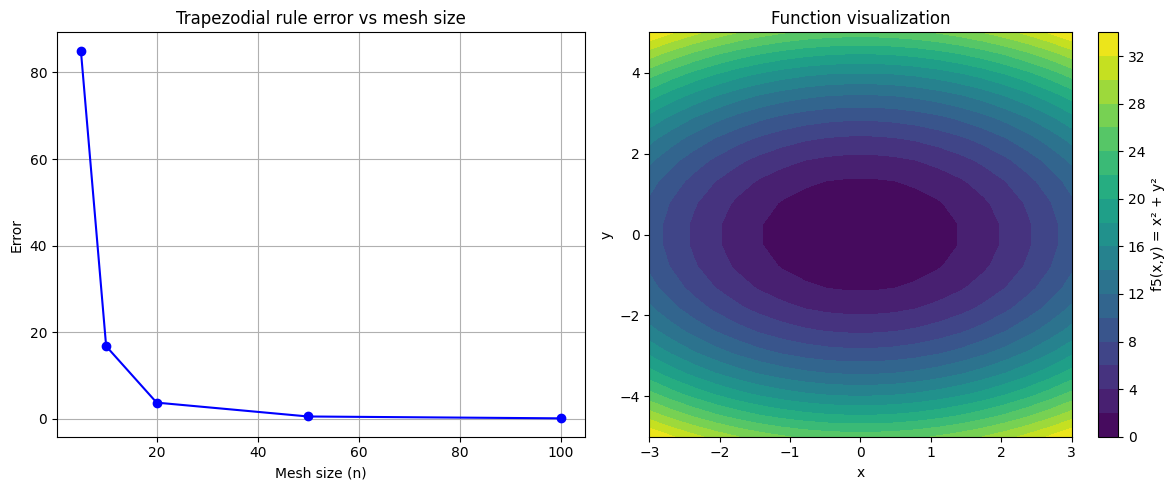

In [9]:
result_iter, error_iter = integrate.dblquad(f4, 0, 1, 0, lambda x: 1-x)
result_tiled, error_tiled = integrate.dblquad(f4, 0, 1, 0, lambda x: 1-x)

print("Integral: ∫∫1/(√(x+y)·(1+x+y)) dxdy")
print(f"Iterated: {result_iter:.10f}, error: {error_iter:.2e}")
print(f"Tiled: {result_tiled:.10f}, error: {error_tiled:.2e}")
print(f"Difference between methods: {abs(result_iter - result_tiled):.2e}")
print()

x = np.linspace(-3, 3, 20)
y = np.linspace(-5, 5, 20)
X, Y = np.meshgrid(x, y)
Z = f5(X, Y)

results_trapz = []
grid_sizes = [5, 10, 20, 50, 100]

for n in grid_sizes:
    x_grid = np.linspace(-3, 3, n)
    y_grid = np.linspace(-5, 5, n)
    X_grid, Y_grid = np.meshgrid(x_grid, y_grid)
    Z_grid = f5(X_grid, Y_grid)

    result = np.trapezoid(np.trapezoid(Z_grid, y_grid, axis=0), x_grid)
    results_trapz.append(result)

result_integral2, error_integral2 = integrate.dblquad(f5, -3, 3, -5, 5)

print("Integral: ∫∫(x² + y²) dxdy (trapezoidal rule)")
for _, (n, result) in enumerate(zip(grid_sizes, results_trapz)):
    print(f"{n}x{n} mesh: {result:.10f}")

print(f"\nReference value (integral2): {result_integral2:.10f}")
print(f"integral2 method error: {error_integral2:.2e}")

print("\nAccuracy comparison:")
for _, (n, result) in enumerate(zip(grid_sizes, results_trapz)):
    error = abs(result - result_integral2)
    print(f"{n}x{n} mesh - error: {error:.2e}")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(grid_sizes, [abs(r - result_integral2) for r in results_trapz], "bo-")
plt.xlabel("Mesh size (n)")
plt.ylabel("Error")
plt.title("Trapezodial rule error vs mesh size")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.contourf(X, Y, Z, levels=20, cmap="viridis")
plt.colorbar(label="f5(x,y) = x² + y²")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Function visualization")
plt.xlim(-3, 3)
plt.ylim(-5, 5)

plt.tight_layout()
plt.show()